In [10]:
import sys, os
if os.path.abspath(os.pardir) not in sys.path:
    sys.path.insert(1, os.path.abspath(os.pardir))
import numpy as np
import pandas as pd
import config

import IPython.display as ipd

pd.set_option('max_columns', 50)
pd.set_option('max_rows', 150)

import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
data_path = config.config.DATA.BASE

In [12]:
os.listdir(config.config.DATA.BASE)

['test.csv',
 'train_audio',
 'example_test_audio_metadata.csv',
 'example_test_audio',
 'train.csv',
 'sample_submission.csv',
 'example_test_audio_summary.csv']

In [13]:
# total birds
len(os.listdir(os.path.join(config.config.DATA.BASE, "train_audio")))

264

In [18]:
ipd.Audio(os.path.join(config.config.DATA.BASE, "train_audio", "aldfly", "XC134874.mp3"))

In [21]:
train = pd.read_csv(os.path.join(data_path, "train.csv"))
train.shape

(21375, 35)

In [22]:
train.head()

,rating,playback_used,ebird_code,channels,date,pitch,duration,filename,speed,species,number_of_notes,title,secondary_labels,bird_seen,sci_name,location,latitude,sampling_rate,type,elevation,description,bitrate_of_mp3,file_type,volume,background,xc_id,url,country,author,primary_label,longitude,length,time,recordist,license
0,3.5,no,aldfly,1 (mono),2013-05-25,Not specified,25,XC134874.mp3,Not specified,Alder Flycatcher,Not specified,XC134874 Alder Flycatcher (Empidonax alnorum),"['Empidonax minimus_Least Flycatcher', 'Leioth...",yes,Empidonax alnorum,"Grey Cloud Dunes SNA, Washington, Minnesota",44.793,48000 (Hz),call,220 m,Two short segments of fairly quiet *pip* calls...,192000 (bps),mp3,Not specified,American Yellow Warbler (Setophaga aestiva); L...,134874,https://www.xeno-canto.org/134874,United States,Jonathon Jongsma,Empidonax alnorum_Alder Flycatcher,-92.962,Not specified,8:00,Jonathon Jongsma,Creative Commons Attribution-ShareAlike 3.0
1,4.0,no,aldfly,2 (stereo),2013-05-27,both,36,XC135454.mp3,both,Alder Flycatcher,1-3,XC135454 Alder Flycatcher (Empidonax alnorum),[],yes,Empidonax alnorum,"Carver's Gap Parking area, Roan Mountain Stat...",36.1065,44100 (Hz),"call, song",1700 m,At least three birds seen here moving around s...,128000 (bps),mp3,level,NaN,135454,https://www.xeno-canto.org/135454,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...
2,4.0,no,aldfly,2 (stereo),2013-05-27,both,39,XC135455.mp3,both,Alder Flycatcher,1-3,XC135455 Alder Flycatcher (Empidonax alnorum),[],yes,Empidonax alnorum,"Carver's Gap Parking area, Roan Mountain Stat...",36.1065,44100 (Hz),"call, song",1700 m,At least three birds seen chasing each other a...,128000 (bps),mp3,level,NaN,135455,https://www.xeno-canto.org/135455,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...
3,3.5,no,aldfly,2 (stereo),2013-05-27,both,33,XC135456.mp3,both,Alder Flycatcher,1-3,XC135456 Alder Flycatcher (Empidonax alnorum),"['Dumetella carolinensis_Gray Catbird', 'Bomby...",yes,Empidonax alnorum,"Carver's Gap Parking area, Roan Mountain Stat...",36.1065,44100 (Hz),"call, song",1700 m,img:http://www.flickr.com/photos/madbirder/888...,128000 (bps),mp3,level,Grey Catbird (Dumetella carolinensis); Cedar W...,135456,https://www.xeno-canto.org/135456,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...
4,4.0,no,aldfly,2 (stereo),2013-05-27,both,36,XC135457.mp3,level,Alder Flycatcher,1-3,XC135457 Alder Flycatcher (Empidonax alnorum),[],yes,Empidonax alnorum,"Carver's Gap Parking area, Roan Mountain Stat...",36.1065,44100 (Hz),"call, song",1700 m,img:http://www.flickr.com/photos/madbirder/888...,128000 (bps),mp3,level,NaN,135457,https://www.xeno-canto.org/135457,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...


In [23]:
# unique birds
train['ebird_code'].nunique()

264

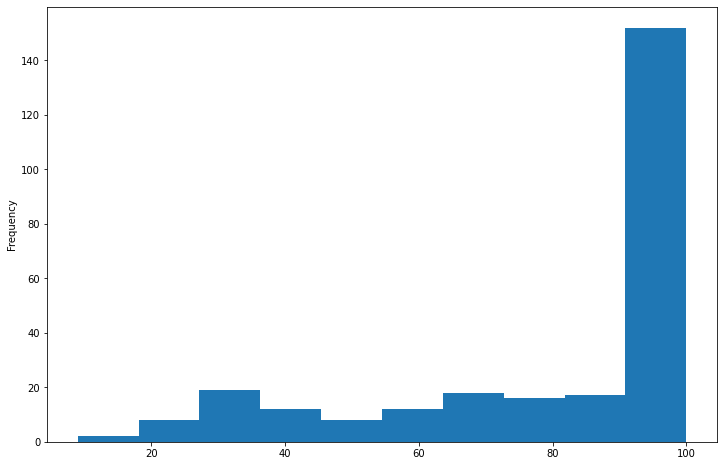

In [24]:
plt.figure(figsize=(12,8))
train['ebird_code'].value_counts().plot(kind='hist')

In [25]:
# location of the recording
train['location'].value_counts()

 Portal, Arizona                                                                    360
 Viera Wetlands, Florida                                                            152
 River Lakes Conservation Area near Viera, Brevard Co, Florida                      125
 Elsen's Hill, DuPage County, Illinois                                              114
 San Bernardino National Wildlife Refuge, Cochise County, Arizona                    98
                                                                                   ... 
 Rhossili Bay, Gower, Wales                                                           1
 Port Townsend, Jefferson County, Washington                                          1
 ACM Riberas del Zamora, Limón Indanza, Morona Santiago                               1
 Mark Youngdahl Urban Conservation Area, Saint Joseph, Buchanan County, Missouri      1
 Ramsey Canyon, Arizona                                                               1
Name: location, Length: 6349, dt

In [27]:
train['location'].apply(lambda x: x.split(',')[-1]).value_counts().head(10)

 California          2290
 Arizona             1545
 Florida             1041
 Colorado             979
 British Columbia     926
 Québec               567
 New York             486
 Montana              484
 Minnesota            452
 Tennessee            402
Name: location, dtype: int64

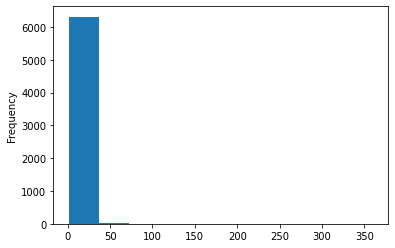

In [29]:
train['location'].value_counts().plot(kind='hist')

In [30]:
train['location'].nunique()

6349

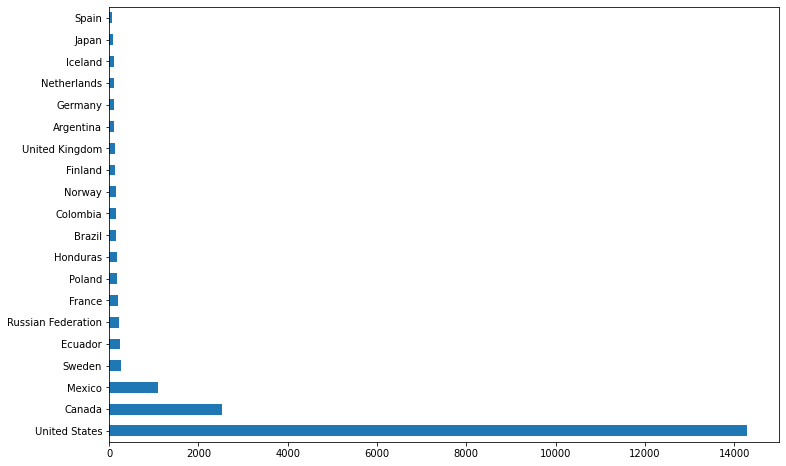

In [31]:
plt.figure(figsize=(12,8))
train['country'].value_counts().head(20).plot(kind='barh')

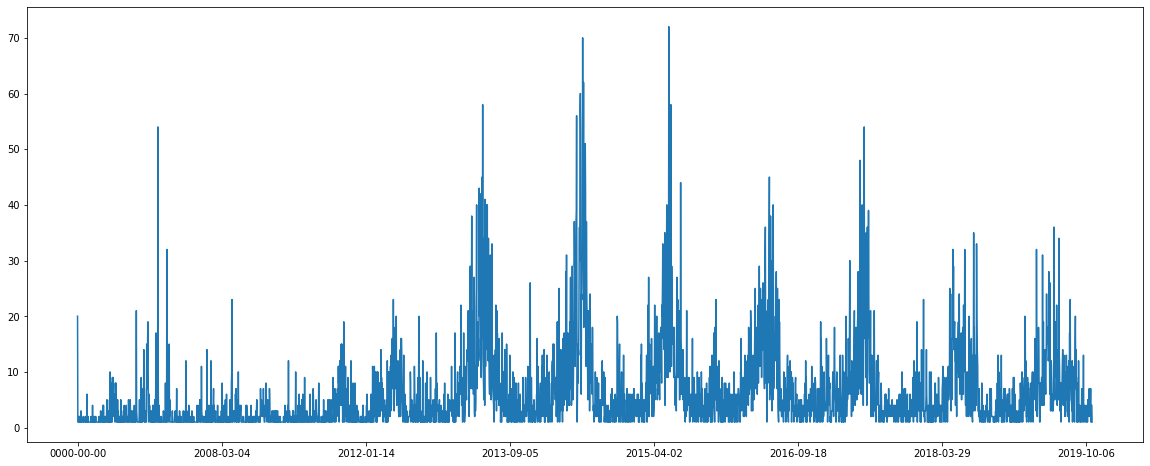

In [32]:
plt.figure(figsize=(20,8))
train['date'].value_counts().sort_index().plot()

In [33]:
train['date'].sort_values()[15:30].values

array(['0000-00-00', '0000-00-00', '0000-00-00', '0000-00-00',
       '0000-00-00', '0201-07-11', '1012-05-27', '1012-05-29',
       '1979-06-02', '1982-06-30', '1982-06-30', '1982-07-08',
       '1982-07-14', '1982-07-14', '1982-11-22'], dtype=object)

Text(0.5, 1.0, 'Ratings Count')

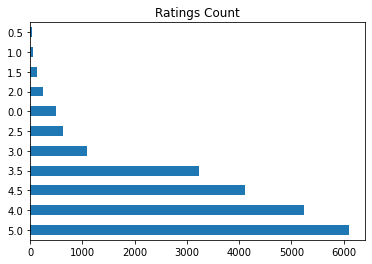

In [34]:
train['rating'].value_counts().plot(kind='barh')
plt.title('Ratings Count')

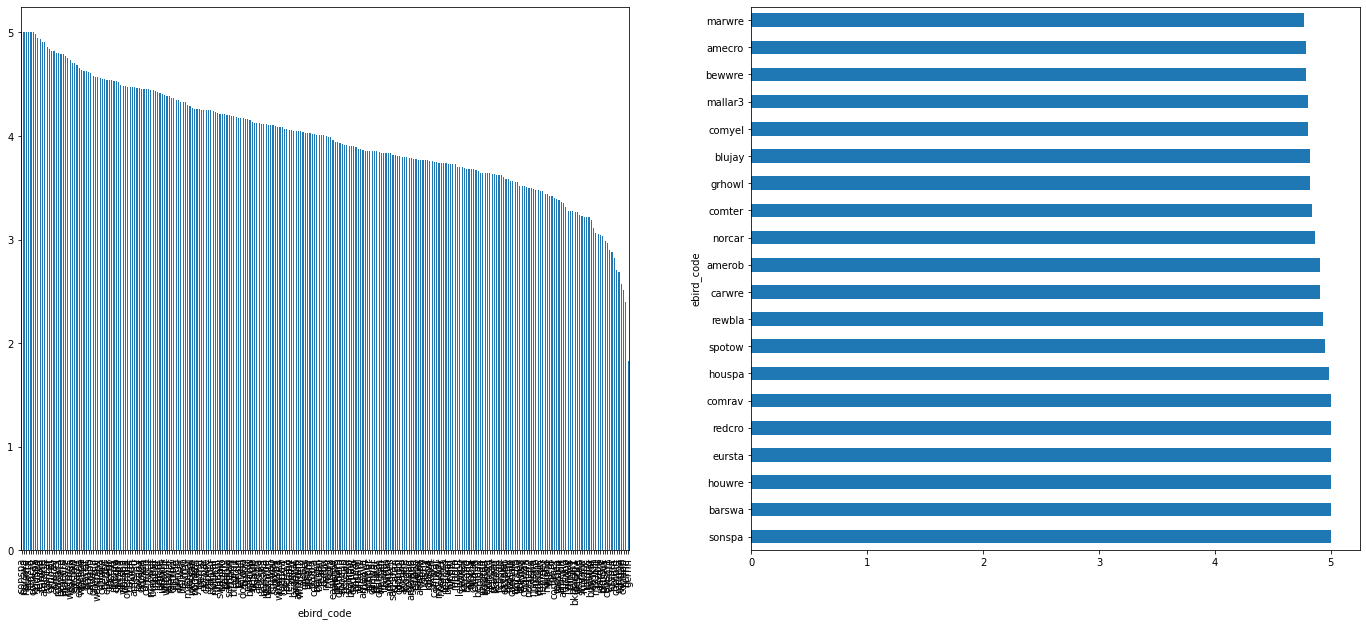

In [41]:
fig, ax = plt.subplots(figsize=(24,10))
plt.subplot(1,2,1)
train.groupby(['ebird_code']).agg({'rating': ['mean', 'std']}).reset_index().sort_values(('rating', 'mean'), ascending=False).set_index('ebird_code')['rating']['mean'].plot(kind='bar')
plt.subplot(1,2,2)
train.groupby(['ebird_code']).agg({'rating': ['mean', 'std']}).reset_index().sort_values(('rating', 'mean'), ascending=False).set_index('ebird_code')['rating']['mean'][:20].plot(kind='barh')

Text(0.5, 1.0, 'Distribution of durations')

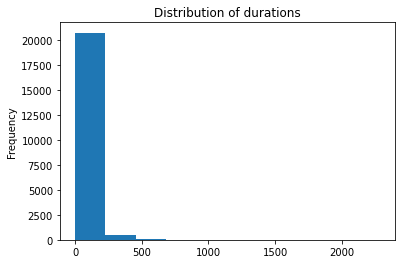

In [42]:
train['duration'].plot(kind='hist')
plt.title('Distribution of durations')

In [43]:
for i in range(50, 100, 5):
    perc = np.percentile(train['duration'], i)
    print(f"{i} percentile of duration is {perc}")

50 percentile of duration is 33.0
55 percentile of duration is 38.0
60 percentile of duration is 43.0
65 percentile of duration is 49.100000000000364
70 percentile of duration is 58.0
75 percentile of duration is 68.0
80 percentile of duration is 81.0
85 percentile of duration is 99.0
90 percentile of duration is 126.0
95 percentile of duration is 182.0


In [44]:
test = pd.read_csv(os.path.join(data_path, "test.csv"))
test

,site,row_id,seconds,audio_id
0,site_1,site_1_0a997dff022e3ad9744d4e7bbf923288_5,5,0a997dff022e3ad9744d4e7bbf923288
1,site_1,site_1_0a997dff022e3ad9744d4e7bbf923288_10,10,0a997dff022e3ad9744d4e7bbf923288
2,site_1,site_1_0a997dff022e3ad9744d4e7bbf923288_15,15,0a997dff022e3ad9744d4e7bbf923288


In [45]:
test_metadata = pd.read_csv(os.path.join(data_path, "example_test_audio_metadata.csv"))
test_metadata.shape

(255, 11)

In [46]:
test_metadata.head()

,file_id,device,date,hour,source,ebird_code,certainty,vox_type,time_start,time_end,channel
0,BLKFR-10-CPL_20190611_093000,BLKFR-10-CPL,20190611,93000,jack,westan,c,call,0.255394,0.858845,2
1,ORANGE-7-CAP_20190606_093000,ORANGE-7-CAP,20190606,93000,jack,squirrel,c,call,0.415966,1.410334,1
2,BLKFR-10-CPL_20190611_093000,BLKFR-10-CPL,20190611,93000,jack,gockin,l,call,0.590725,1.944412,2
3,BLKFR-10-CPL_20190611_093000,BLKFR-10-CPL,20190611,93000,jack,mouchi,c,call,1.609081,2.130985,2
4,ORANGE-7-CAP_20190606_093000,ORANGE-7-CAP,20190606,93000,jack,brncre,c,song,2.461655,2.746925,1


In [47]:
test_summary = pd.read_csv(os.path.join(data_path, "example_test_audio_summary.csv"))
test_summary.head()

,filename_seconds,birds,filename,seconds
0,BLKFR-10-CPL_20190611_093000_5,gockin mouchi westan,BLKFR-10-CPL,5
1,BLKFR-10-CPL_20190611_093000_10,gockin westan,BLKFR-10-CPL,10
2,BLKFR-10-CPL_20190611_093000_15,gockin westan,BLKFR-10-CPL,15
3,BLKFR-10-CPL_20190611_093000_20,mouchi,BLKFR-10-CPL,20
4,BLKFR-10-CPL_20190611_093000_25,mouchi,BLKFR-10-CPL,25


In [48]:
test_summary.shape

(153, 4)

In [49]:
sub = pd.read_csv(os.path.join(data_path, "sample_submission.csv"))
sub

,row_id,birds
0,site_1_0a997dff022e3ad9744d4e7bbf923288_5,nocall
1,site_1_0a997dff022e3ad9744d4e7bbf923288_10,nocall
2,site_1_0a997dff022e3ad9744d4e7bbf923288_15,nocall


In [ ]:
sub.to_csv("submission.csv", index=False)